In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

2025-11-03 18:51:27.427670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-03 18:51:27.434530: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-03 18:51:27.697467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-03 18:51:28.849051: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
#Data Cleaning and Labelling
dataset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df=pd.read_csv("SeoulBikeData.csv",encoding='cp949').drop(["Date","Holiday","Seasons"], axis=1)
df.columns=dataset_cols
df["functional"]==(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

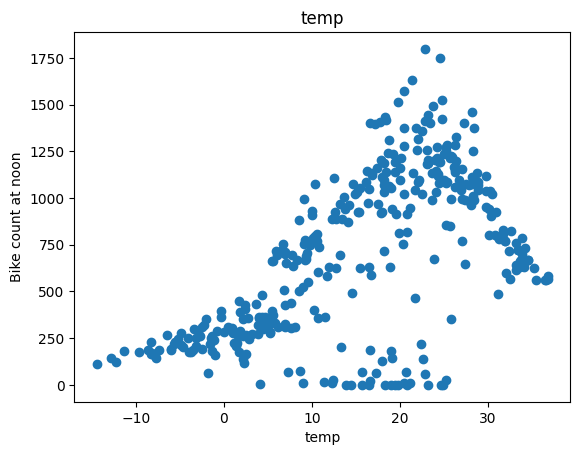

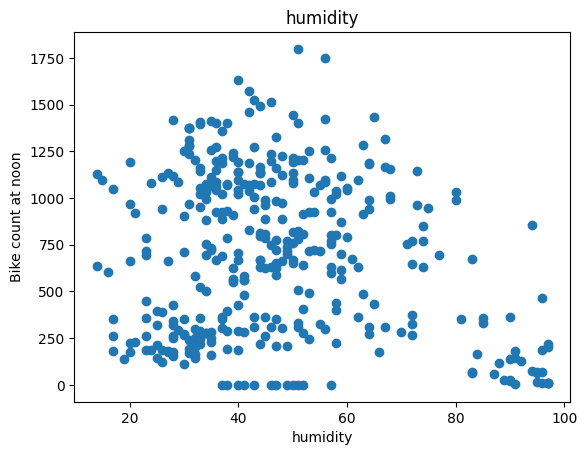

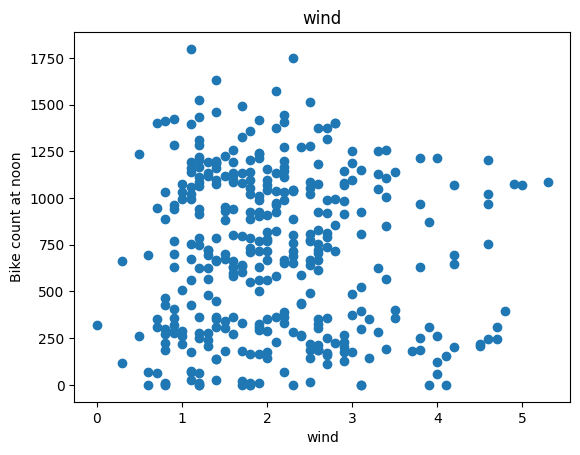

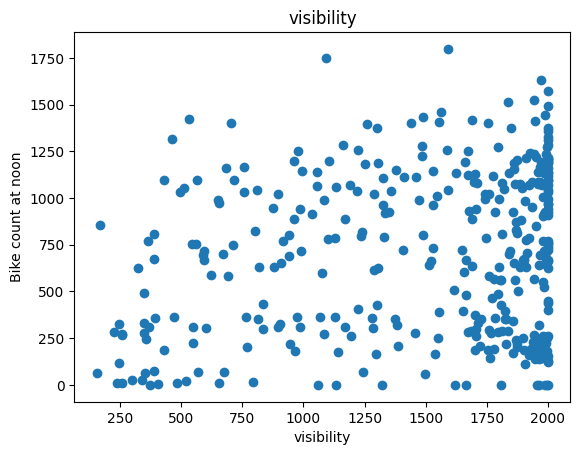

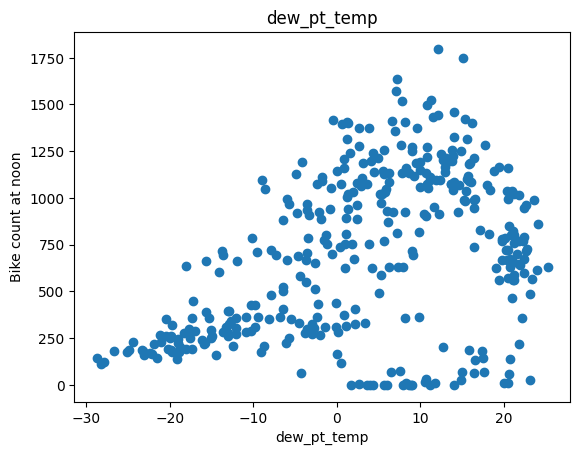

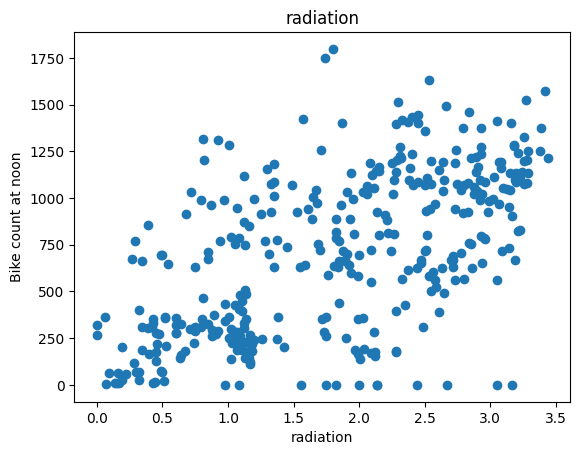

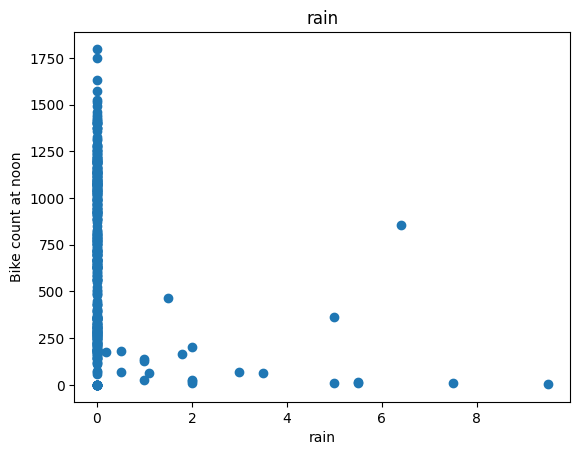

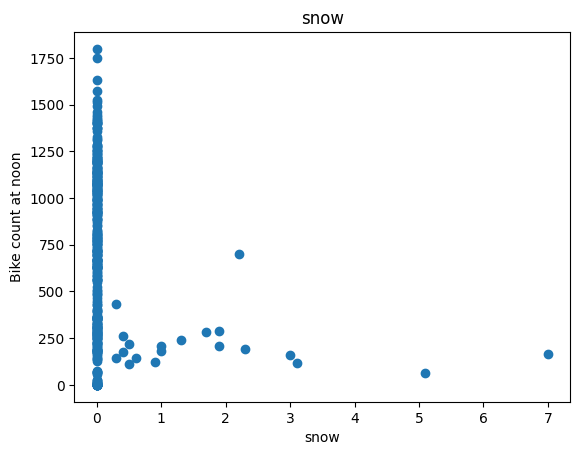

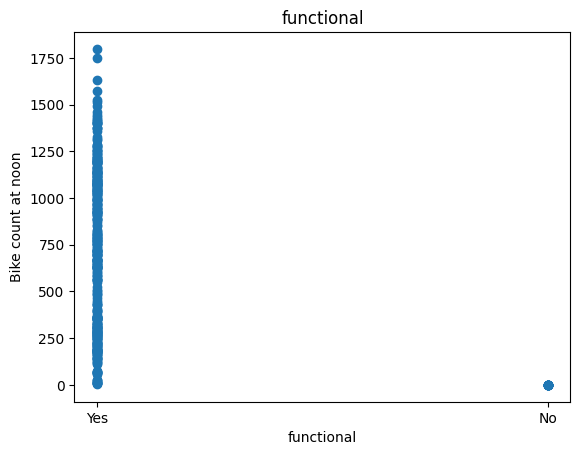

In [3]:
#Data Plotting
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike count at noon")
    plt.show()

In [4]:
df=df.drop(["wind","visibility","functional"],axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [5]:
#Train/valid/test datasets
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
def get_xy(dataframe,y_label,x_labels=None):
    if not x_labels:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)==1:
            X=dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X=dataframe[x_labels].values
    

    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((X,y))

    return data,X,y

_,X_train_temp,y_train_temp=get_xy(train,"bike_count",x_labels=["temp"])
_,X_val_temp,y_val_temp=get_xy(val,"bike_count",x_labels=["temp"])
_,X_test_temp,y_test_temp=get_xy(test,"bike_count",x_labels=["temp"])

/home/azzaro/Desktop/kunk/ML Projects/Bicycles/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
#Traning Linear Regression Model
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)
temp_reg.score(X_test_temp,y_test_temp)

0.2800860491638323

2025-11-03 18:51:30.542149: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


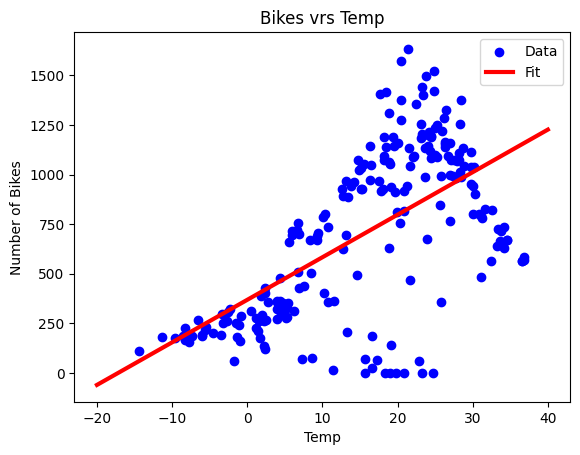

In [7]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="Blue")
x=tf.linspace(-20,40,200)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.title("Bikes vrs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.legend()
plt.show()